<a href="https://colab.research.google.com/github/Cibo420/ZDASemestral/blob/main/ZDA_Semestralka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Introduction***

Premier League, also known as English Premier League, is one of the most prestigious and popular football leagues in the world. It features 20 professional football clubs competing against each other to secure the championship title. Analyzing Premier League statistics provides valuable insights into the game and helps us understand the factors that contribute to a team's success.

In this analysis, we will focus on exploring a comprehensive Premier League dataset. This dataset encompasses a vast array of information, including match results, player statistics, team performances, and various other metrics. By examining this data, we aim to identify key factors that significantly influence a team's performance and determine which aspects contribute most to winning matches.

***Aim:***
The aim of this data analysis is which factors influence the results of a football match conducted between two teams in the most significant way.


***Premier League Overview***

Before delving into the analysis, let's provide a brief overview of the Premier League and its fundamental characteristics.

**Teams:** The Premier League consists of 20 professional football clubs, each comprising a squad of players who compete in matches throughout the season. These teams represent cities, towns, or regions across England.

**Matches:** Premier League teams face each other in a round-robin format, playing a total of 38 matches per season. Each team plays against every other team twice, once at home and once away.

**Goals:** Scoring goals is the primary objective in football matches. Teams strive to outscore their opponents by successfully striking the ball into the opponent's net. The number of goals scored significantly impacts a team's success and victory in matches.

**Points:** Teams earn points based on their performance in matches. A win earns a team three points, a draw results in one point for each team, and a loss yields no points. Accumulating points throughout the season determines a team's position in the league standings.

**Table Standings:** The Premier League table provides an overview of each team's performance and position in the league. It ranks teams based on the number of points earned, with additional factors like goal difference and goals scored acting as tiebreakers. 

***Question/Hypothesis:*** My hypothesis with which Iam starting the analysis is that the indicators of a succesful football team are : 

  1)High amount of goals scored

  2)Low amount ofgoals conceded

  3)High amount of corners taken

  4)High amount of shots taken

  5)High amount of shots on target taken

  6)Low amount of red/yellow cards given 

By analyzing these aspects of the Premier League dataset, we can gain valuable insights into the factors that influence team performance and success in football matches. Let's proceed with exploring the dataset and uncovering the significant factors that contribute to winning matches in the Premier League.






***Dependencies.***

We start off by importing all the necessary libraries needed for our data analysis code.

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import math
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import label_binarize





***Data exploration.***

First we load up all the data from the sources and put them all in one dataframe.

In [255]:
data_files = [
'/content/season-0910_csv.csv',
'/content/season-1011_csv.csv',
'/content/season-1112_csv.csv',
'/content/season-1213_csv.csv',
'/content/season-1314_csv.csv',
'/content/season-1415_csv.csv',
'/content/season-1516_csv.csv',
'/content/season-1617_csv.csv',
'/content/season-1718_csv.csv',
'/content/season-1819_csv.csv']
data_frames = []
for file in data_files:
  df = pd.read_csv(file)
  data_frames.append(df)
data_all = pd.concat(data_frames,ignore_index = True)
data_all.head(10)



,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSH,PSD,PSA,PSCH,PSCD,PSCA
0,E0,2009-08-15,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0,1.67,3.60,5.50,1.65,3.40,5.00,1.67,3.50,5.25,1.70,3.5,4.90,1.67,3.3,4.50,1.65,3.40,5.00,1.70,3.4,5.50,1.67,3.60,5.50,1.70,3.40,5.00,1.62,3.50,5.50,37,1.72,1.66,3.77,3.51,6.05,5.33,32,2.04,1.92,1.91,1.81,21.0,0.0,1.28,1.22,4.40,3.99,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,2009-08-15,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0,3.60,3.25,2.10,3.40,3.15,2.00,3.40,3.25,2.10,3.20,3.2,2.20,3.00,3.2,2.10,3.15,3.25,2.10,3.50,3.2,2.15,3.30,3.25,2.20,3.25,3.20,2.20,3.30,3.20,2.20,38,3.78,3.37,3.35,3.24,2.25,2.12,33,2.15,2.04,1.78,1.71,24.0,0.0,2.58,2.38,1.60,1.54,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,2009-08-15,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0,2.25,3.25,3.25,2.15,3.15,3.15,2.25,3.25,3.10,2.20,3.2,3.20,2.10,3.2,3.00,2.25,3.20,2.90,2.30,3.2,3.20,2.30,3.25,3.10,2.25,3.20,3.10,2.20,3.20,3.30,38,2.37,2.24,3.31,3.20,3.40,3.15,33,2.25,2.12,1.70,1.66,23.0,0.0,1.68,1.61,2.33,2.23,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,2009-08-15,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0,1.17,6.50,21.00,1.17,6.00,13.00,1.20,6.00,15.00,1.20,5.5,14.00,1.17,5.5,12.00,1.17,5.75,15.00,1.17,6.5,21.00,1.18,6.50,17.00,1.17,6.00,17.00,1.20,5.50,19.00,38,1.20,1.17,7.71,6.26,23.14,16.39,34,1.67,1.58,2.44,2.26,22.0,0.0,1.03,1.02,17.05,12.96,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,2009-08-15,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,3.20,3.25,2.30,2.95,3.15,2.25,3.00,3.25,2.30,3.10,3.1,2.30,2.88,3.0,2.25,3.00,3.20,2.20,3.20,3.2,2.30,3.25,3.25,2.25,2.90,3.30,2.30,3.25,3.20,2.20,38,3.34,3.07,3.34,3.21,2.42,2.28,34,2.20,2.06,1.77,1.70,24.0,0.0,2.27,2.20,1.73,1.63,NaN,NaN,NaN,NaN,NaN,NaN
5,E0,2009-08-15,Portsmouth,Fulham,0,1,A,0,1,A,M Atkinson,16,9,4,3,11,18,6,4,3,2,0,0,2.63,3.20,2.75,2.30,3.15,2.85,2.60,3.25,2.60,2.50,3.2,2.70,2.38,3.2,2.60,2.40,3.20,2.70,2.75,3.2,2.60,2.63,3.20,2.70,2.62,3.20,2.62,2.50,3.20,2.75,38,2.81,2.53,3.25,3.18,2.90,2.73,33,2.28,2.12,1.70,1.65,23.0,0.0,1.98,1.83,2.05,1.95,NaN,NaN,NaN,NaN,NaN,NaN
6,E0,2009-08-15,Stoke,Burnley,2,0,H,2,0,H,S Bennett,12,9,5,5,15,10,3,6,2,2,0,0,1.91,3.30,4.33,1.85,3.20,4.00,1.90,3.30,4.00,1.90,3.3,3.90,1.91,3.2,3.50,1.90,3.25,3.75,2.00,3.2,4.00,1.91,3.25,4.33,1.90,3.25,4.00,1.91,3.30,4.00,38,2.00,1.91,3.47,3.29,4.36,4.02,33,2.25,2.10,1.71,1.67,22.0,0.0,1.45,1.39,3.05,2.85,NaN,NaN,NaN,NaN,NaN,NaN
7,E0,2009-08-15,Wolves,West Ham,0,2,A,0,1,A,C Foy,19,16,11,13,9,5,8,6,0,0,0,0,2.63,3.30,2.70,2.55,3.15,2.55,2.50,3.20,2.75,2.55,3.3,2.55,2.38,3.2,2.60,2.50,3.20,2.60,2.62,3.2,2.70,2.60,3.20,2.75,2.50,3.25,2.62,2.50,3.25,2.70,38,2.78,2.57,3.30,3.19,2.87,2.68,33,2.16,2.03,1.80,1.72,22.0,0.0,1.95,1.85,2.00,1.92,NaN,NaN,NaN,NaN,NaN,NaN
8,E0,2009-08-16,Man United,Birmingham,1,0,H,1,0,H,L Mason,26,6,17,4,13,7,13,2,1,1,0,0,1.20,6.00,17.00,1.20,5.50,12.00,1.20,6.00,15.00,1.20,5.7,12.00,1.17,5.5,12.00,1.18,5.50,13.00,1.20,5.5,19.00,1.20,6.00,17.00,1.17,6.00,17.00,1.20,5.50,19.00,38,1.23,1.19,6.62,5.91,21.00,14.99,33,1.69,1.62,2.35,2.18,20.0,0.0,1.04,1.02,15.00,11.42,NaN,NaN,NaN,NaN,NaN,NaN
9,E0,2009-08-16,Tottenham,Liverpool,2,1,H,1,0,H,P Dowd,17,6,11,3,14,16,6,5,3,3,0,0,3.20,3.25,2.30,3.25,3.15,2.10,3.10,3.20,2.25,3.10,3.1,2.30,3.00,3.2,2.10,3.00,3.20,2.20,3.20,3.2,2.30,3.00,3.25,2.20,3.00,3.25,2.25,3.20,3.20,2.20,36,3.31,3.13,3.40,3.22,2.39,2.23,31,2.07,1.95,1.85,1.79,21.0,0.0,2.38,2.24,1.73,1.61,NaN,NaN,NaN,NaN,NaN,NaN


***Data cleansing***

By selecting the relevant columns, checking for missing values, and dropping rows with missing values, the code prepares the data_all DataFrame for further analysis, ensuring that it contains the necessary information without missing data.

In [217]:

# Select columns of interest
cols_of_interest = ['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']
data_all = data_all[cols_of_interest]

# Check for missing values
print(data_all.isnull().sum())

# Drop rows with missing values
data_all = data_all.dropna()






Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64


***Data analysis***

 Firstly we take a detailed look at the information about every single individual attribute.

In [218]:
data_all.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HY,AY,HR,AR
count,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1.570526,1.180000,0.691579,0.522368,14.181316,11.229211,6.014211,4.763947,6.028158,4.774211,1.478421,1.771316,0.059474,0.087105
std,1.322363,1.160788,0.838739,0.735319,5.514299,4.687029,3.443571,2.891895,3.131663,2.737833,1.198647,1.284515,0.244206,0.294804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,3.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,6.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,6.000000,2.000000,3.000000,0.000000,0.000000
max,9.000000,7.000000,5.000000,5.000000,43.000000,30.000000,24.000000,20.000000,19.000000,19.000000,7.000000,9.000000,2.000000,2.000000


Unfortunately we werent able to draw many conclusions from that, so we will proceed to deeper data analysis.

***Correlation matrix***

This code selects specific features, calculates the correlation matrix for those features, and provides a visual representation of the correlations through the heatmap. The heatmap helps visualize the relationships between the selected features and can provide insights into potential associations between variables. Thanks to this matrix we can better understand which columns are more significant towards a team winning and which are less.

<ipython-input-219-ebe78da739dc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X.corr()


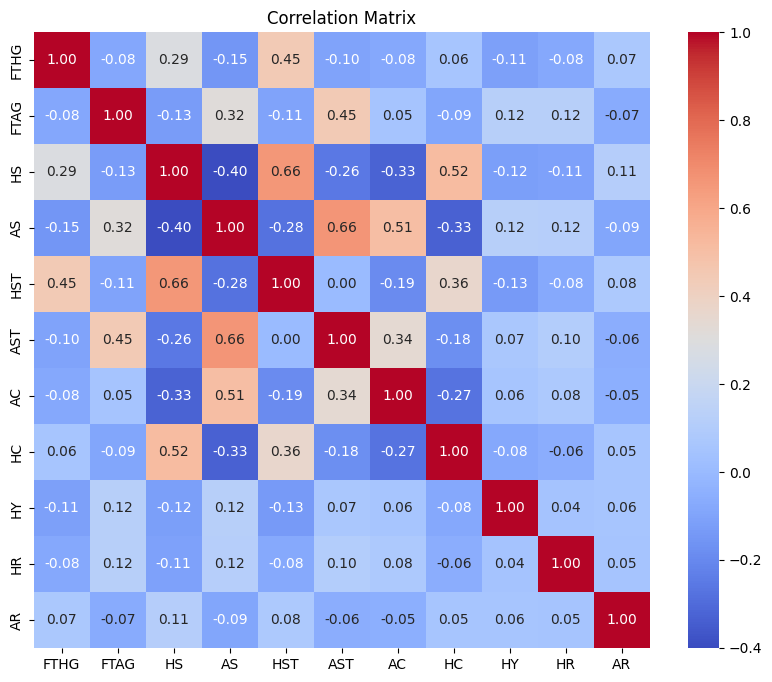

In [219]:
# Select your features
features = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'AC', 'HC', 'HY', 'HR', 'AR','FTR']
X = data_all[features]

# Calculate correlation matrix
correlation_matrix = X.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

***Filtering of relevant attributes***

From the correlation matrix we can see the biggest impact on the result of the match have the following attributes:

1) **FTAG+ FTHG** (Full time home/away goals)

2) **HST + AST** (Home/Away team shots on target)


Lets look at these more in detail how they affect the outcome of the match in following charts.


The number of goals scored by the home team strongly influences match outcomes. Scoring more goals increases the chances of winning, while a higher number of home goals reduces the likelihood of losing. Effective goal-scoring performance is crucial in determining match results. Teams that capitalize on goal-scoring opportunities have a higher chance of securing victories. A higher number of home goals makes it more difficult for opponents to defeat a team. These findings are based on the analyzed dataset and may vary in different contexts. Factors like team strategies and player performance should be considered alongside goal-scoring prowess. The analysis underscores the significance of offensive performance for success in football matches.

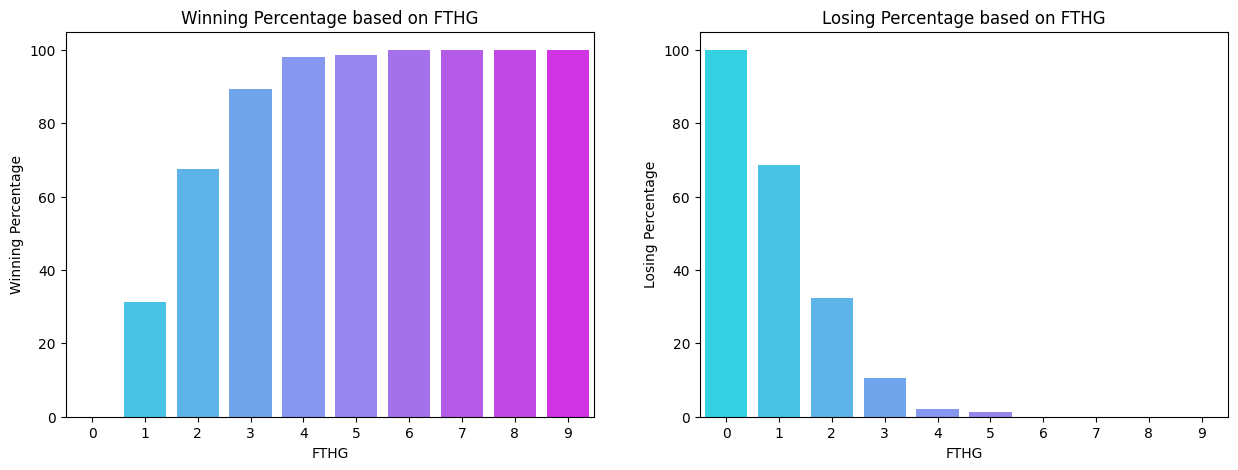

In [222]:
# Select the significant feature
significant_feature = 'FTHG'

# Calculate win percentages based on the feature
win_percentages = []
for value in data_all[significant_feature].unique():
    total_matches = data_all[data_all[significant_feature] == value].shape[0]
    if total_matches > 0:
        won_matches = data_all[(data_all[significant_feature] == value) & (data_all['FTR'] == 1)].shape[0]
        win_percentage = (won_matches / total_matches) * 100
        win_percentages.append([value, win_percentage, 100 - win_percentage])

# Create a DataFrame for plotting
data = pd.DataFrame(win_percentages, columns=[significant_feature, 'Winning Percentage', 'Losing Percentage'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Plot Winning Percentage
sns.barplot(x=significant_feature, y='Winning Percentage', palette='cool', data=data, ax=ax[0])
ax[0].set_title('Winning Percentage based on ' + significant_feature)

# Plot Losing Percentage
sns.barplot(x=significant_feature, y='Losing Percentage', palette='cool', data=data, ax=ax[1])
ax[1].set_title('Losing Percentage based on ' + significant_feature)

plt.show()

Same thing as for the home goals.


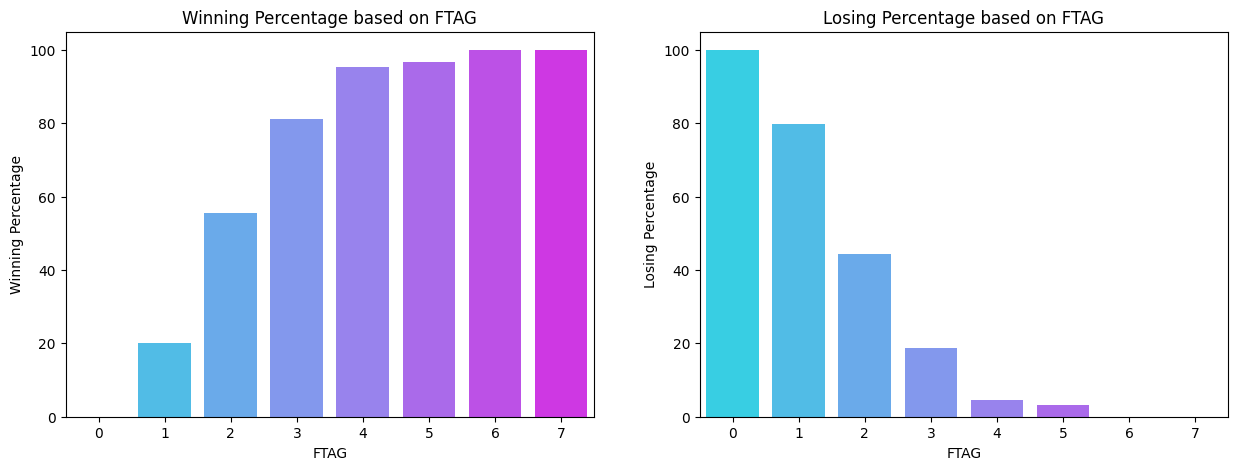

In [223]:
# Select the significant feature
significant_feature = 'FTAG'

# Calculate win percentages based on the feature
win_percentages = []
for value in data_all[significant_feature].unique():
    total_matches = data_all[data_all[significant_feature] == value].shape[0]
    if total_matches > 0:
        won_matches = data_all[(data_all[significant_feature] == value) & (data_all['FTR'] == 2)].shape[0]
        win_percentage = (won_matches / total_matches) * 100
        win_percentages.append([value, win_percentage, 100 - win_percentage])

# Create a DataFrame for plotting
data = pd.DataFrame(win_percentages, columns=[significant_feature, 'Winning Percentage', 'Losing Percentage'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Plot Winning Percentage
sns.barplot(x=significant_feature, y='Winning Percentage', palette='cool', data=data, ax=ax[0])
ax[0].set_title('Winning Percentage based on ' + significant_feature)

# Plot Losing Percentage
sns.barplot(x=significant_feature, y='Losing Percentage', palette='cool', data=data, ax=ax[1])
ax[1].set_title('Losing Percentage based on ' + significant_feature)

plt.show()

***Full time home shots on goal***

The analysis focuses on the number of shots on target by the home team (significant feature) and its impact on match outcomes. The bar plots illustrate the winning and losing percentages based on different values of the feature. The "Winning Percentage" plot shows that as the number of shots on target by the home team increases, the winning percentage tends to increase. Conversely, the "Losing Percentage" plot demonstrates that a higher number of shots on target by the home team is associated with a lower probability of losing. These findings emphasize the importance of creating and converting shots on target for achieving success in football matches.

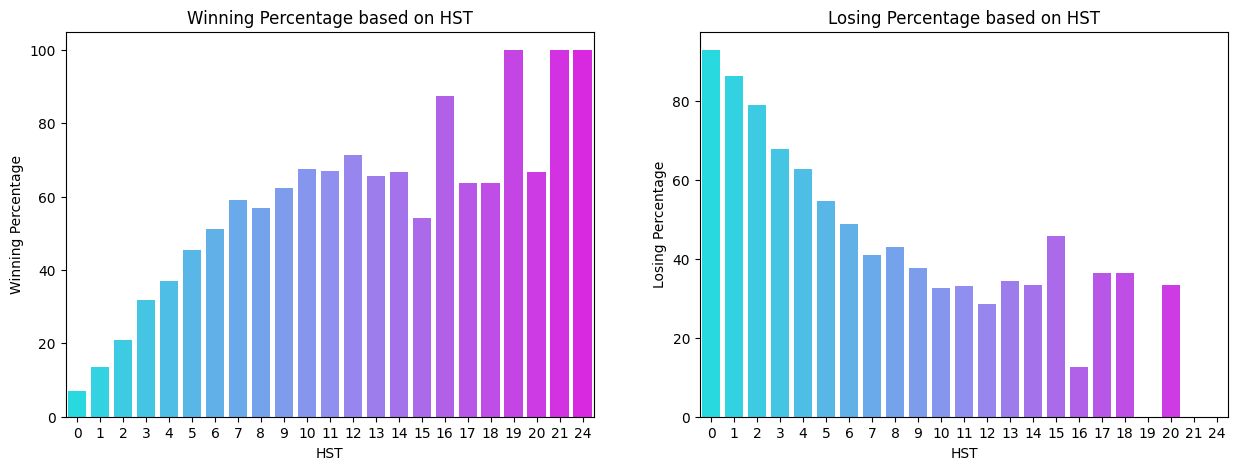

In [224]:
# Select the significant feature
significant_feature = 'HST'

# Calculate win percentages based on the feature
win_percentages = []
for value in data_all[significant_feature].unique():
    total_matches = data_all[data_all[significant_feature] == value].shape[0]
    if total_matches > 0:
        won_matches = data_all[(data_all[significant_feature] == value) & (data_all['FTR'] == 1)].shape[0]
        win_percentage = (won_matches / total_matches) * 100
        win_percentages.append([value, win_percentage, 100 - win_percentage])

# Create a DataFrame for plotting
data = pd.DataFrame(win_percentages, columns=[significant_feature, 'Winning Percentage', 'Losing Percentage'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Plot Winning Percentage
sns.barplot(x=significant_feature, y='Winning Percentage', palette='cool', data=data, ax=ax[0])
ax[0].set_title('Winning Percentage based on ' + significant_feature)

# Plot Losing Percentage
sns.barplot(x=significant_feature, y='Losing Percentage', palette='cool', data=data, ax=ax[1])
ax[1].set_title('Losing Percentage based on ' + significant_feature)

plt.show()

Full time away team shots impact on the result.
Same as the home shots on goal.

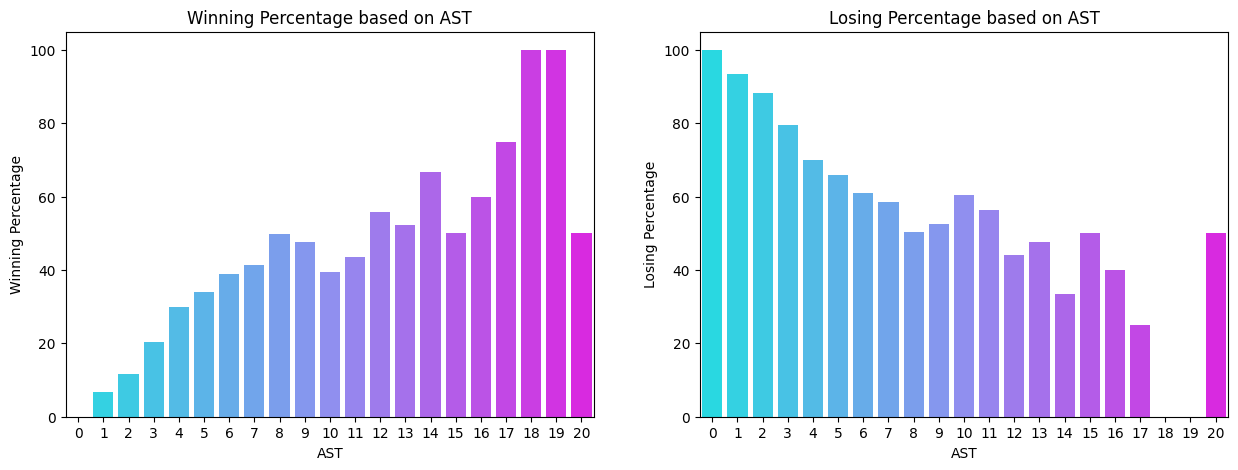

In [225]:
#Select the significant feature
significant_feature = 'AST'

# Calculate win percentages based on the feature
win_percentages = []
for value in data_all[significant_feature].unique():
    total_matches = data_all[data_all[significant_feature] == value].shape[0]
    if total_matches > 0:
        won_matches = data_all[(data_all[significant_feature] == value) & (data_all['FTR'] == 2)].shape[0]
        win_percentage = (won_matches / total_matches) * 100
        win_percentages.append([value, win_percentage, 100 - win_percentage])

# Create a DataFrame for plotting
data = pd.DataFrame(win_percentages, columns=[significant_feature, 'Winning Percentage', 'Losing Percentage'])

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Plot Winning Percentage
sns.barplot(x=significant_feature, y='Winning Percentage', palette='cool', data=data, ax=ax[0])
ax[0].set_title('Winning Percentage based on ' + significant_feature)

# Plot Losing Percentage
sns.barplot(x=significant_feature, y='Losing Percentage', palette='cool', data=data, ax=ax[1])
ax[1].set_title('Losing Percentage based on ' + significant_feature)

plt.show()

## ***Confusion matrix, ROC, Coeficients***


This code applies logistic regression to the Premier League dataset for predicting match outcomes. The 'FTR' column, indicating the match result, is transformed into binary values: 1 for a home team win, 2 for an away team win, and 0 for a draw.

Features such as home team goals ('FTHG'), away team goals ('FTAG'), shots by the home team ('HS'), shots by the away team ('AS'), shots on target by the home team ('HST'), shots on target by the away team ('AST'), and others are selected for training the model.

The rest are just visualisations of said data analysis.

              FTHG      FTAG        HS        AS       HST       AST  \
Class                                                                  
Draw     -0.139659  0.047989 -0.002237 -0.001636 -0.001075  0.007246   
Home Win  7.641509 -7.607751 -0.008627 -0.002081  0.062482 -0.052854   
Away Win -7.501850  7.559762  0.010864  0.003717 -0.061407  0.045607   

                AC        HC        HY        HR        AR  
Class                                                       
Draw     -0.007715  0.009238 -0.011327 -0.051838  0.025705  
Home Win  0.022135 -0.023580 -0.001358 -0.172619  0.088275  
Away Win -0.014421  0.014342  0.012685  0.224457 -0.113979  


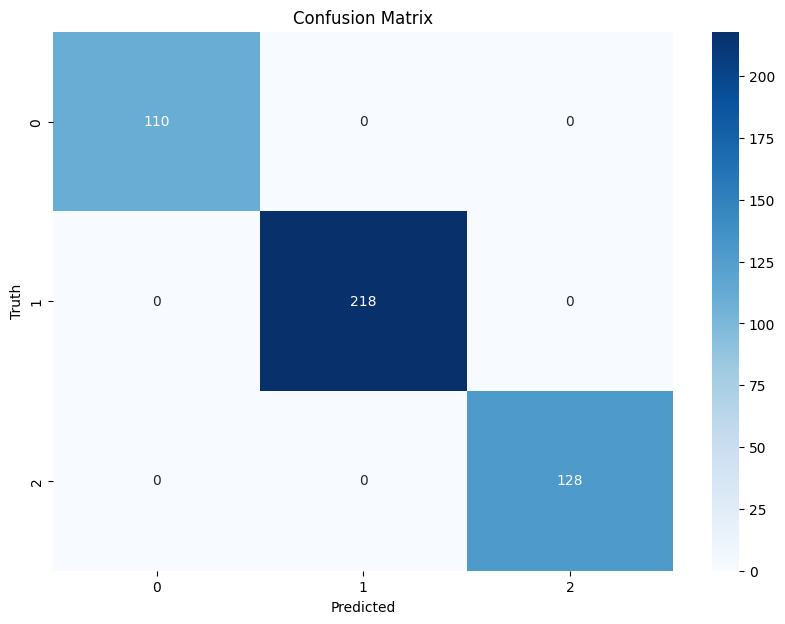

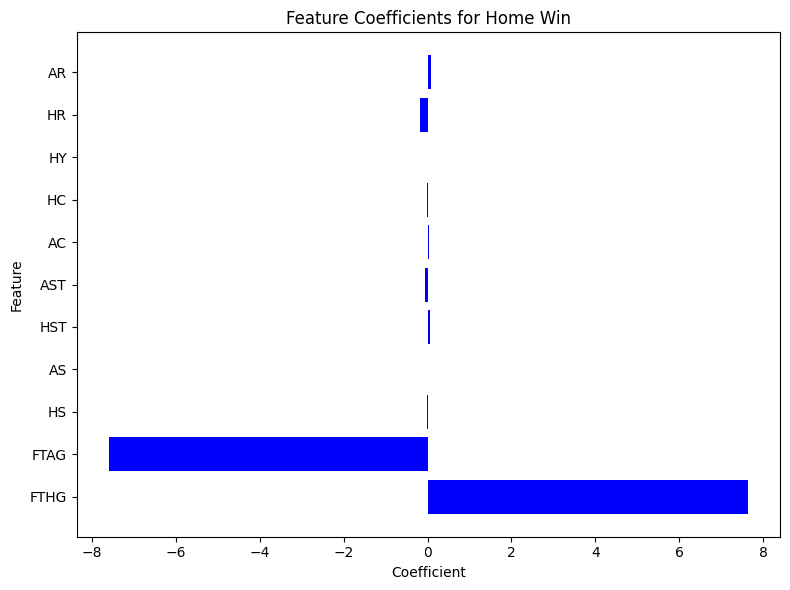

In [256]:

def result_to_binary(result):
    if result == 'A':
        return 2  # Away team won
    elif result == 'H':
        return 1  # Home team won
    else:
        return 0  # Draw

# Apply the function to the 'FTR' column
data_all['FTR'] = data_all['FTR'].apply(result_to_binary)
# Select your features
features = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'AC', 'HC','HY', 'HR', 'AR']
X = data_all[features]
y = data_all['FTR']
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Fit the model
model = LogisticRegression(max_iter = 3000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Binarize the output (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])



# Evaluate the model
confusion_mat = confusion_matrix(y_test, y_pred)


coefficients = pd.DataFrame(model.coef_, columns=features)
coefficients['Class'] = ['Draw', 'Home Win', 'Away Win']
coefficients = coefficients.set_index('Class')
print(coefficients)

# Fit the model
model = LogisticRegression(max_iter = 2000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


# Plot Coefficients
coefficients = pd.DataFrame(model.coef_, columns=features)
coefficients['Class'] = ['Draw', 'Home Win', 'Away Win']
coefficients = coefficients.set_index('Class')

# Plotting coefficients of 'Home Win'
plt.figure(figsize=(8, 6))
plt.barh(coefficients.columns, coefficients.loc['Home Win'], color='b', align='center')
plt.title('Feature Coefficients for Home Win')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## ***Final standings by season***

In the following part we are constructing a final standings table for each of the seasons we have data for. The standings table is sorted in descending order based on points, goal difference, and goals scored, in that order. This provides an overview of the teams' performance in each season, allowing for comparisons and identification of the top-performing teams. 
Overall, the code provides a concise and informative representation of the season-wise standings, enabling a quick assessment of team performance and rankings across multiple seasons.

In [250]:
def process_season(data, season):
    # Assign points based on result (FTR)
    def assign_points(result):
        if result == 'H':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0

    # For away matches, the points assignment is slightly different
    def assign_points_away(result):
        if result == 'A':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0

    # Calculate points from home matches
    data['HomePoints'] = data['FTR'].apply(assign_points)
    home_points = data.groupby('HomeTeam')['HomePoints'].sum()

    # Calculate points from away matches
    data['AwayPoints'] = data['FTR'].apply(assign_points_away)
    away_points = data.groupby('AwayTeam')['AwayPoints'].sum()

    # Sum home and away points to get total points
    total_points = home_points.add(away_points, fill_value=0)

    # Calculate goal difference for ranking teams with same points
    home_goal_diff = data.groupby('HomeTeam').apply(lambda x: x['FTHG'].sum() - x['FTAG'].sum())
    away_goal_diff = data.groupby('AwayTeam').apply(lambda x: x['FTAG'].sum() - x['FTHG'].sum())
    goal_diff = home_goal_diff.add(away_goal_diff, fill_value=0)

    # Calculate goals scored for ranking teams with same points and goal difference
    home_goals_scored = data.groupby('HomeTeam')['FTHG'].sum()
    away_goals_scored = data.groupby('AwayTeam')['FTAG'].sum()
    goals_scored = home_goals_scored.add(away_goals_scored, fill_value=0)

    # Create a DataFrame for the standings
    standings = pd.DataFrame({
        'Team': total_points.index,
        'Points': total_points.values,
        'GoalDifference': goal_diff.values,
        'GoalsScored': goals_scored.values,
    })


    # Sort the table by points first, then by goal difference, and finally by goals scored
    standings = standings.sort_values(by=['Points', 'GoalDifference', 'GoalsScored'], ascending=False).reset_index(drop=True)

    return standings


for i, df in enumerate(data_frames):
    season = f"{2009+i}/{2010 + i}"
    standings = process_season(df, season)
    print(f"Season {season}")
    print(standings)
    print()


Season 2009/2010
           Team  Points  GoalDifference  GoalsScored
0       Chelsea      86              71          103
1    Man United      85              58           86
2       Arsenal      75              42           83
3     Tottenham      70              26           67
4      Man City      67              28           73
5   Aston Villa      64              13           52
6     Liverpool      63              26           61
7       Everton      61              11           60
8    Birmingham      50              -9           38
9     Blackburn      50             -14           41
10        Stoke      47             -14           34
11       Fulham      46              -7           39
12   Sunderland      44              -8           48
13       Bolton      39             -25           42
14       Wolves      38             -24           32
15        Wigan      36             -42           37
16     West Ham      35             -19           47
17      Burnley      30      

## ***Scatterplots***

In the following code I have selected the most significant criteria, which was concluded by my data analysis, and made a comparison through scatterplots to compare the ranking in these criteria and the actual standings in particular season.

The generated plots provide a visual representation of how teams performed in each season. Comparing the standings with metrics such as goals scored, goals conceded, and shots on target allows for an assessment of their correlation with team rankings.

By examining the plots, we can draw conclusions about the significance of these metrics in team performance. For example, if goals scored consistently align with higher standings across seasons, it suggests a strong association between scoring goals and success. Similarly, rankings in goals conceded and shots on target provide insights into defensive capabilities and offensive efficiency.

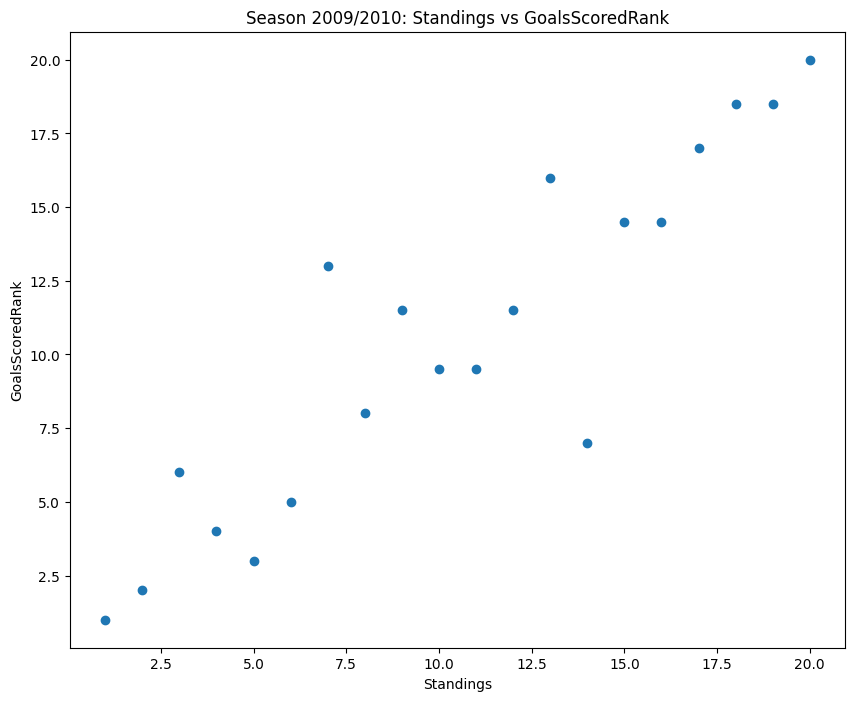

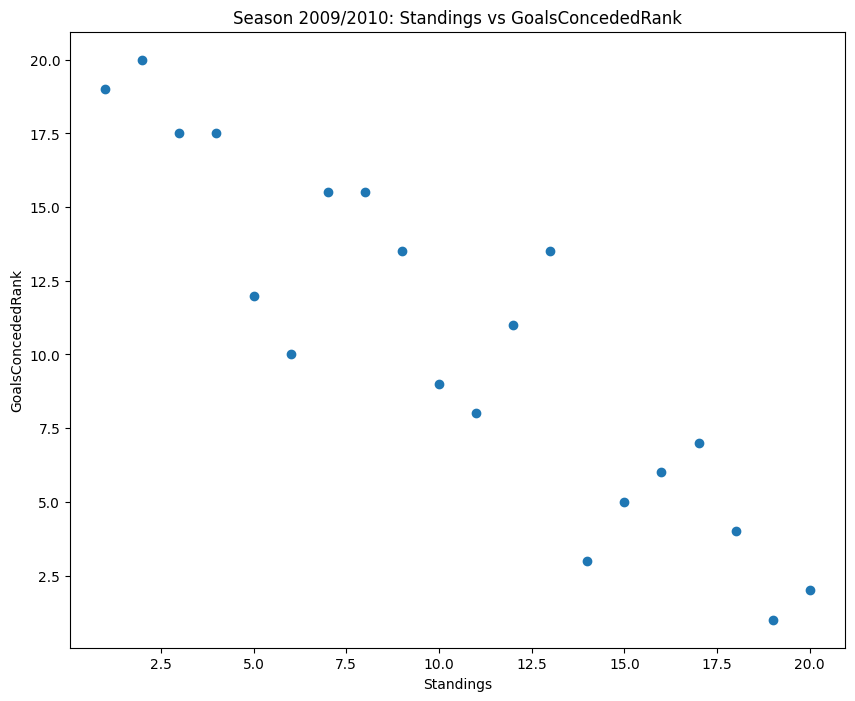

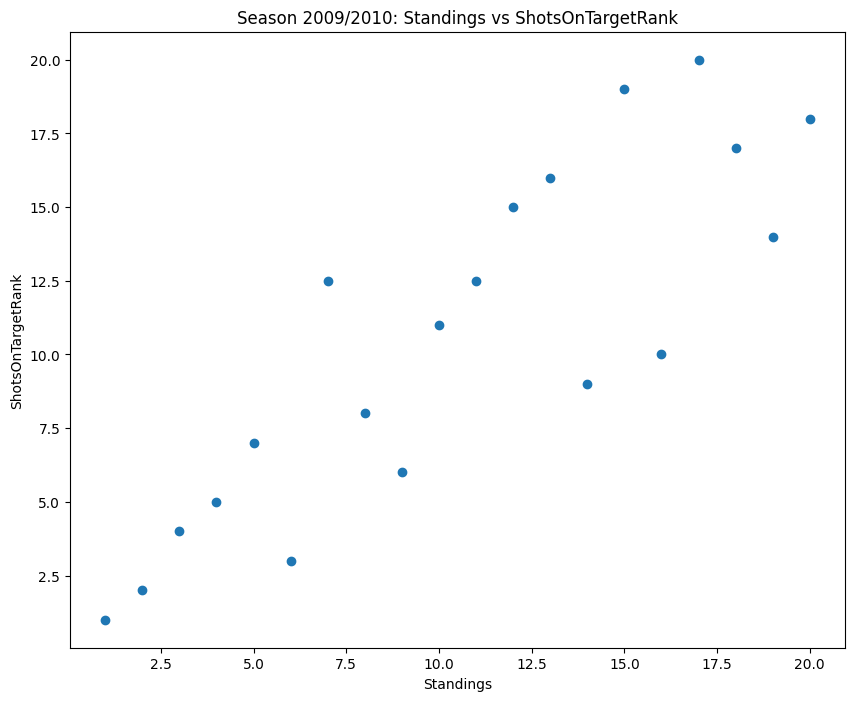

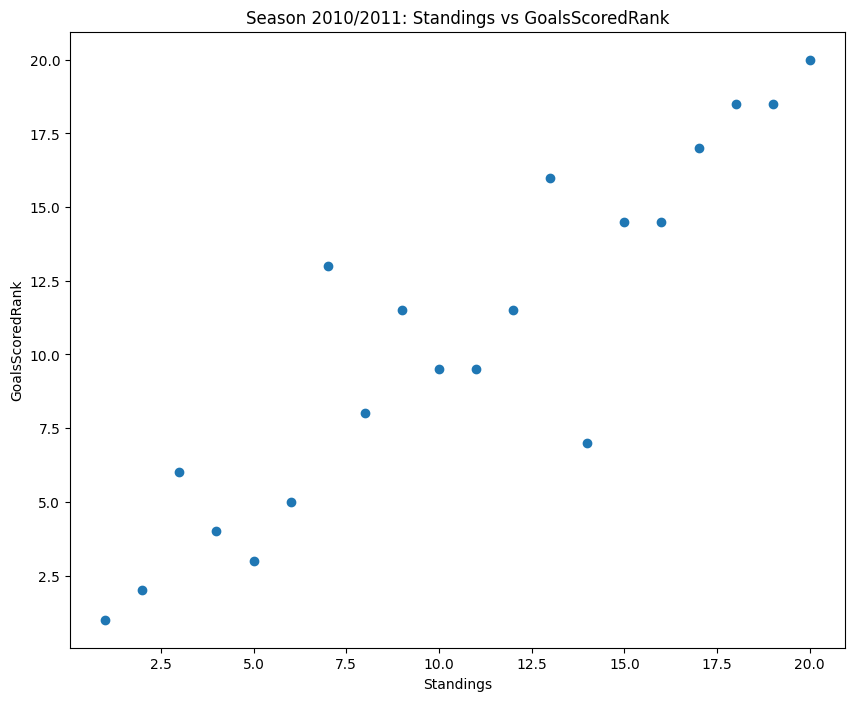

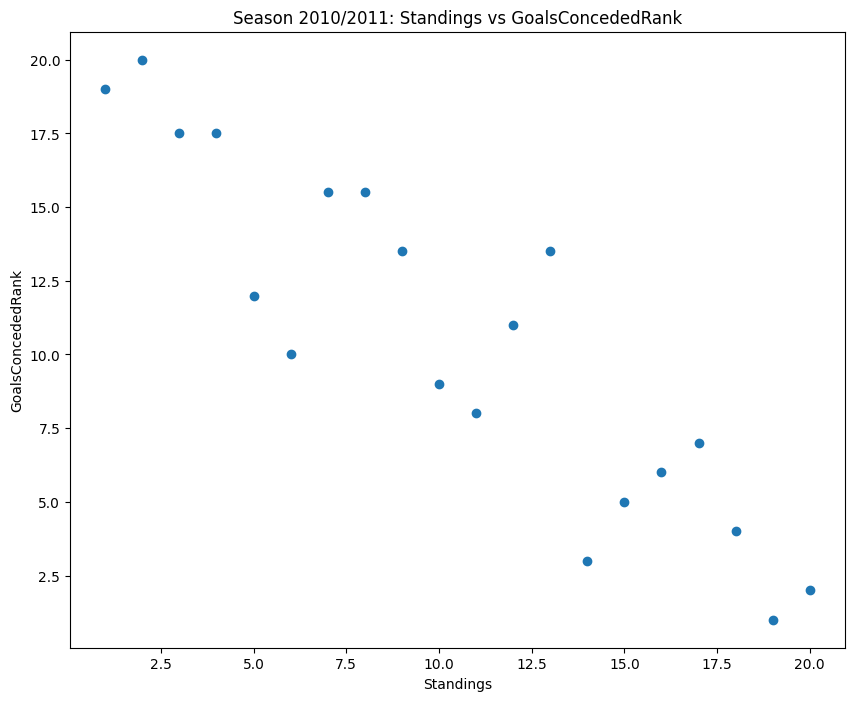

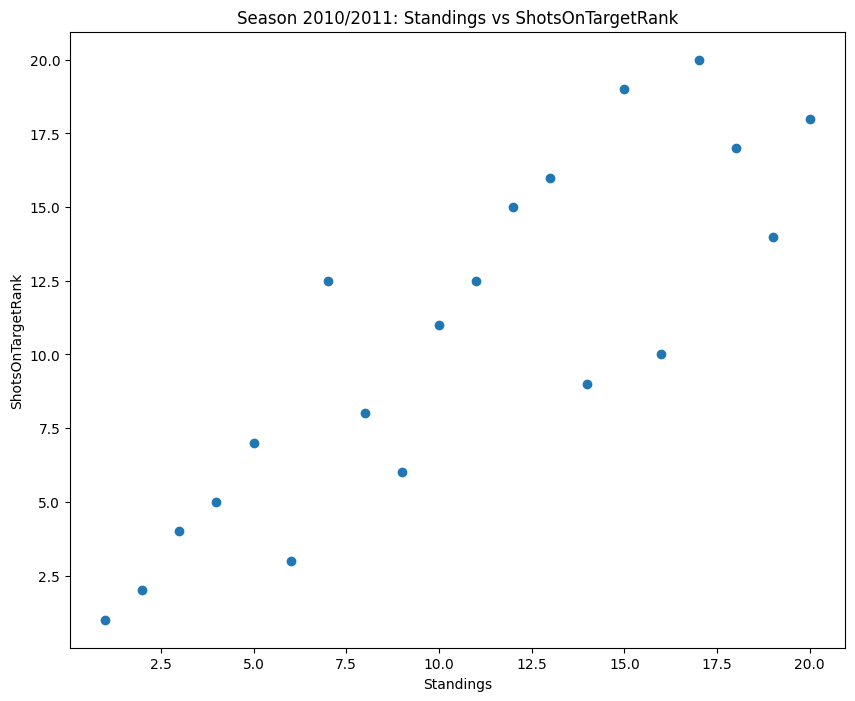

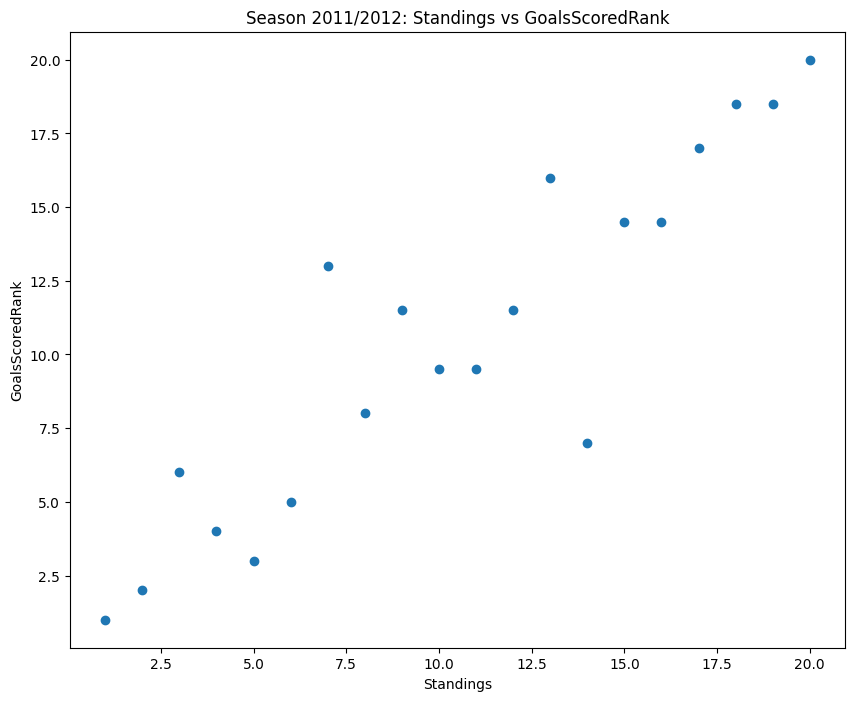

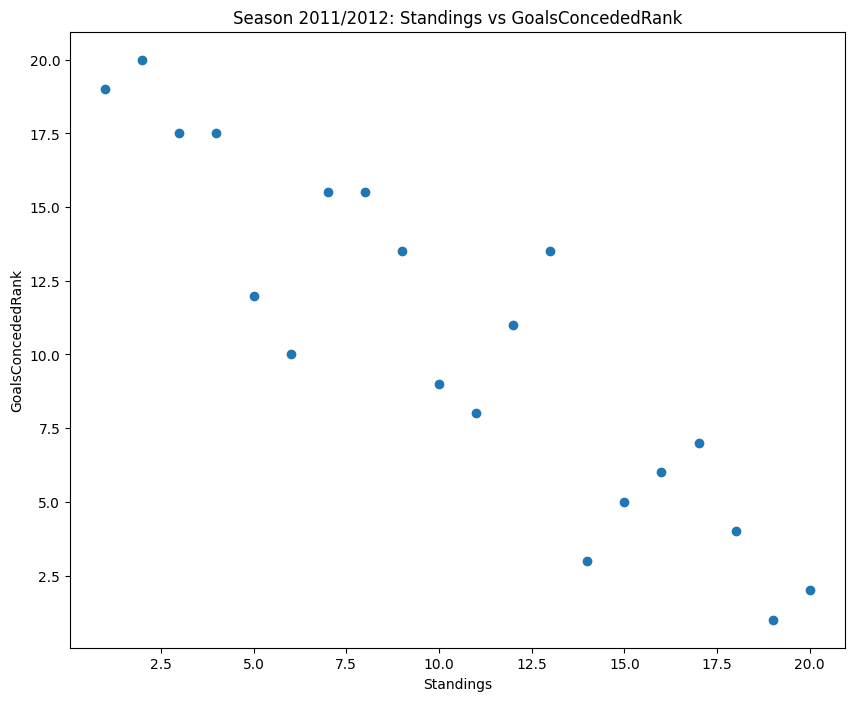

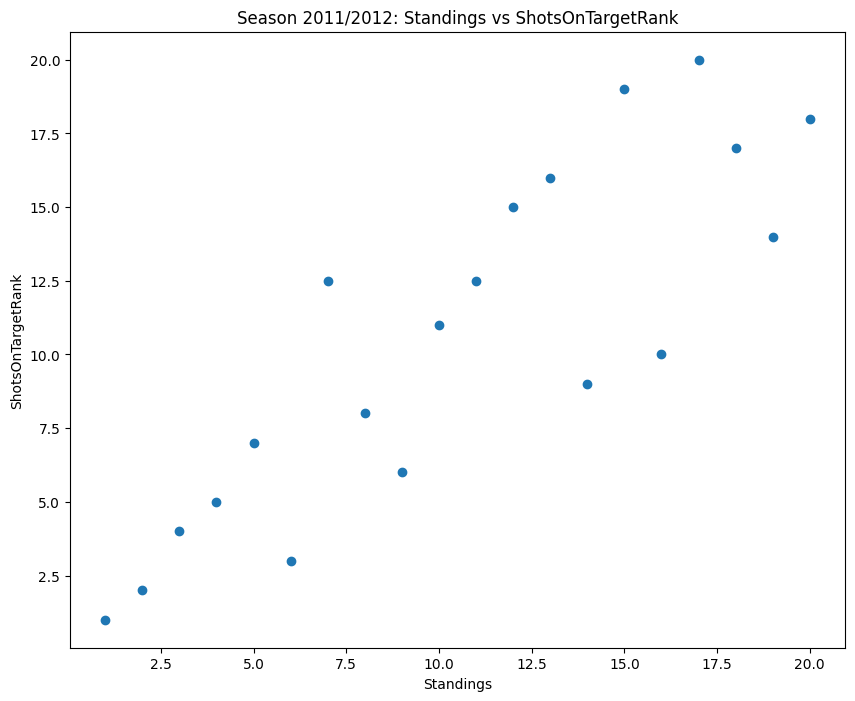

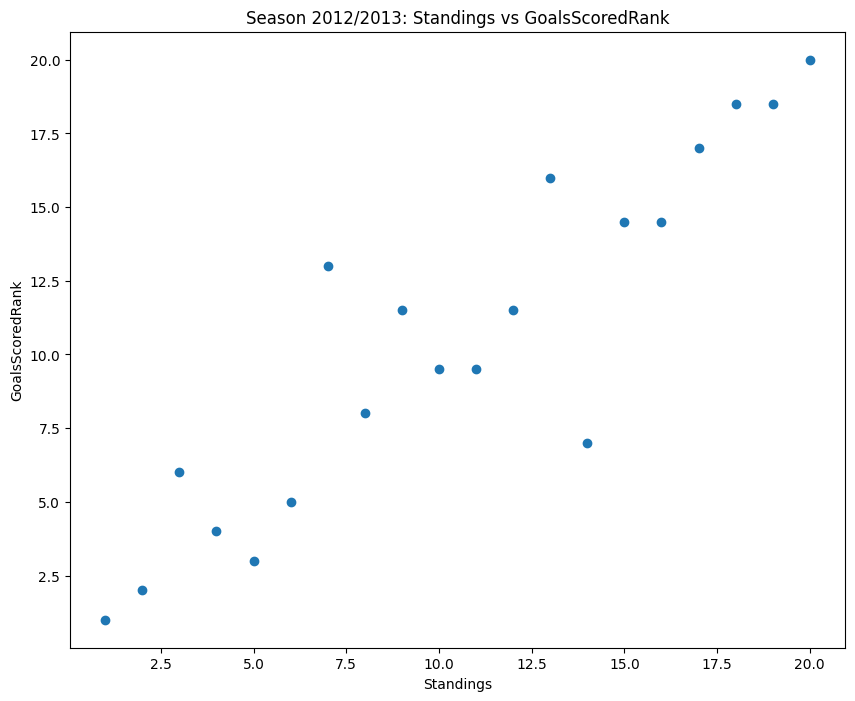

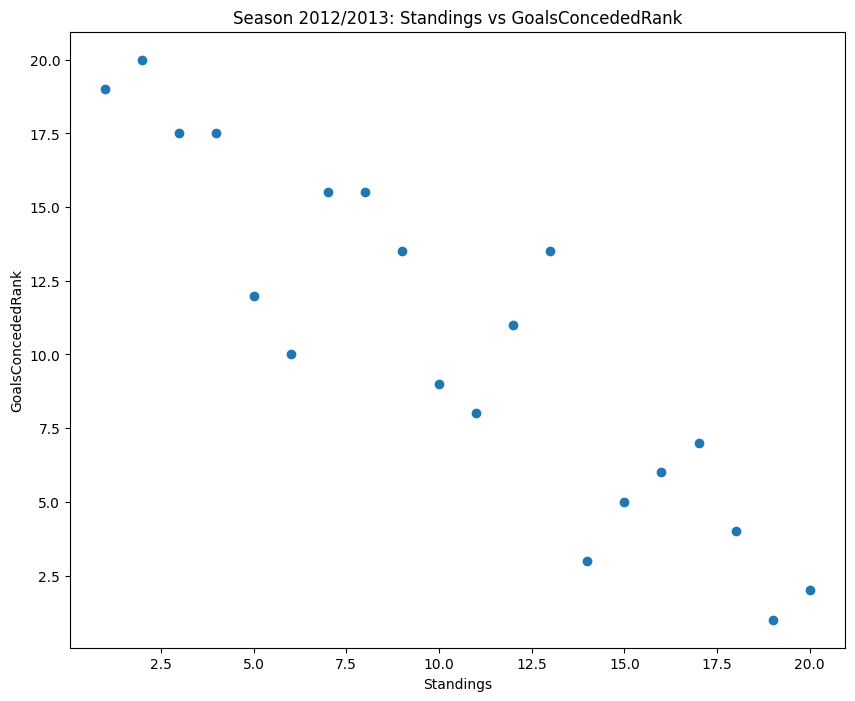

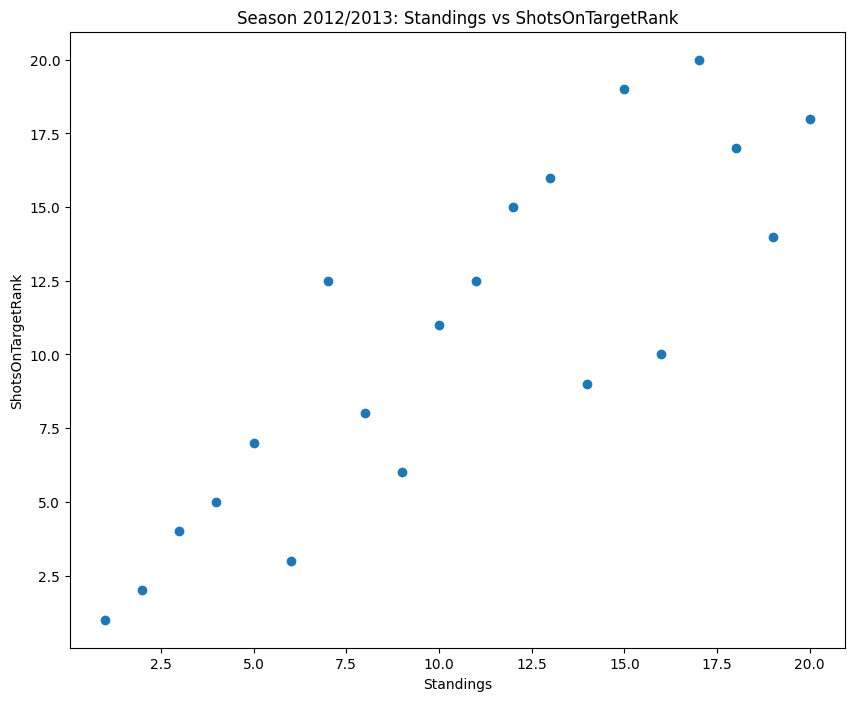

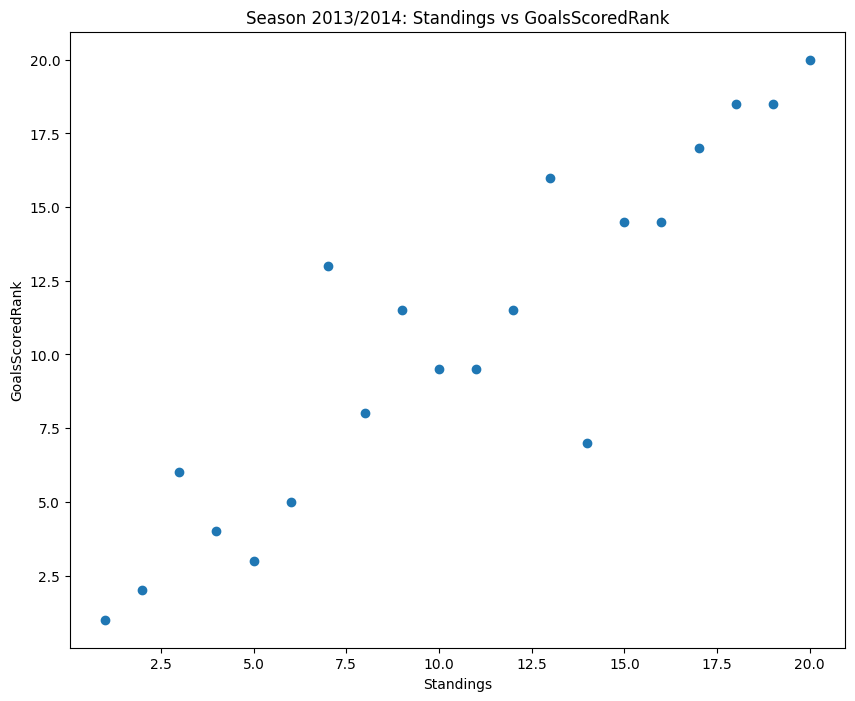

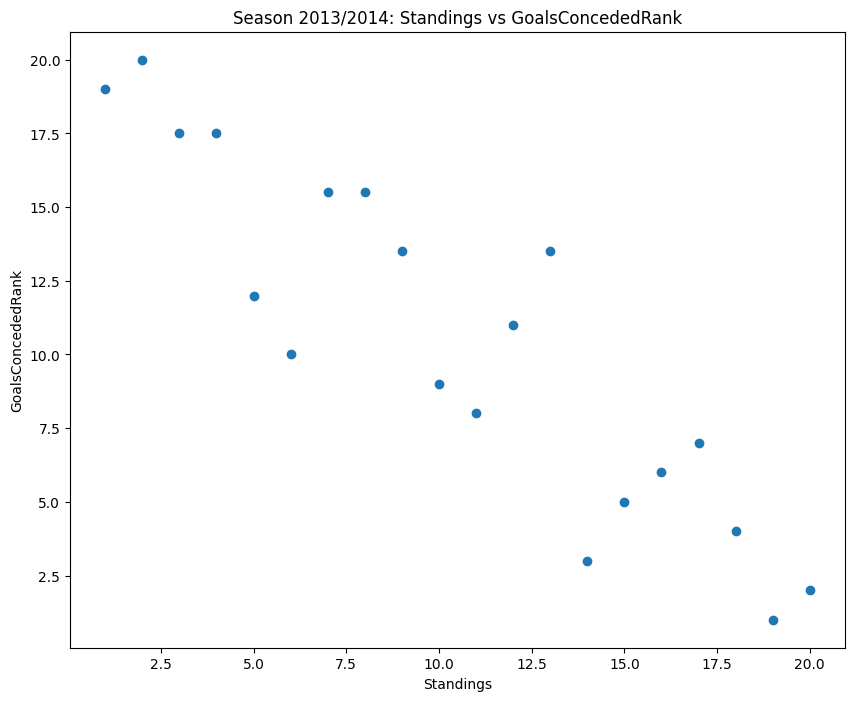

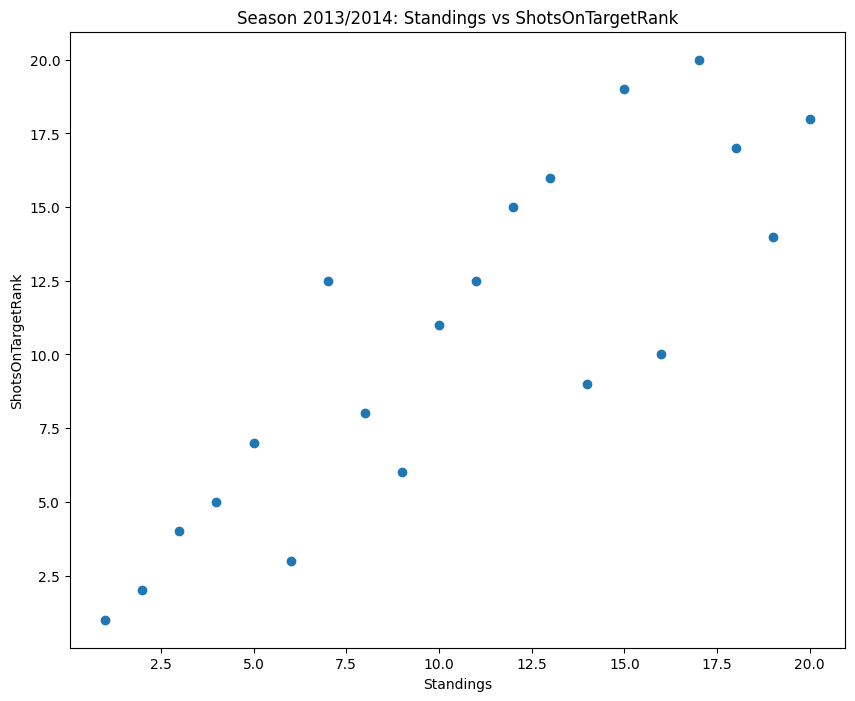

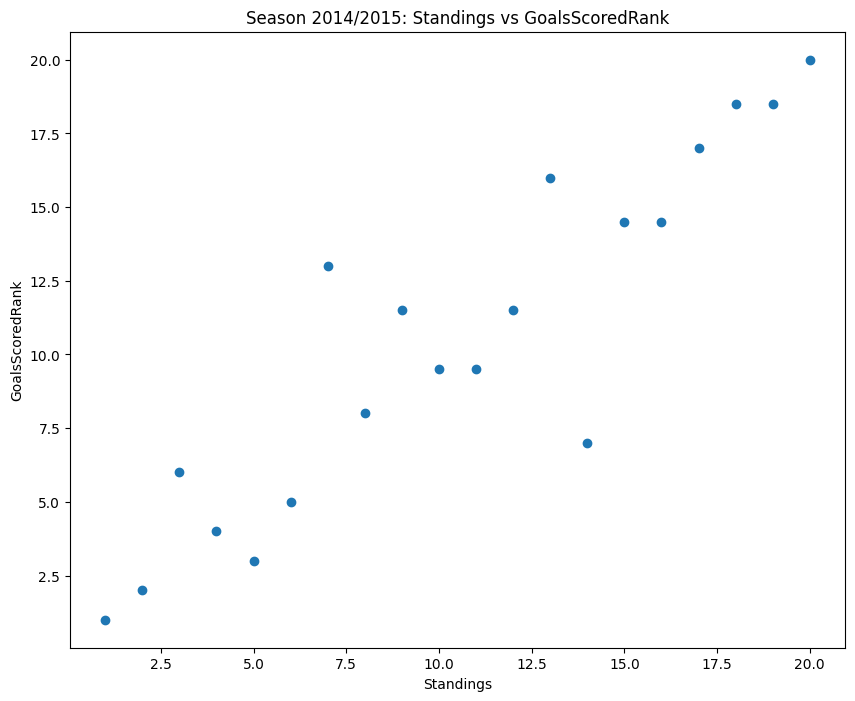

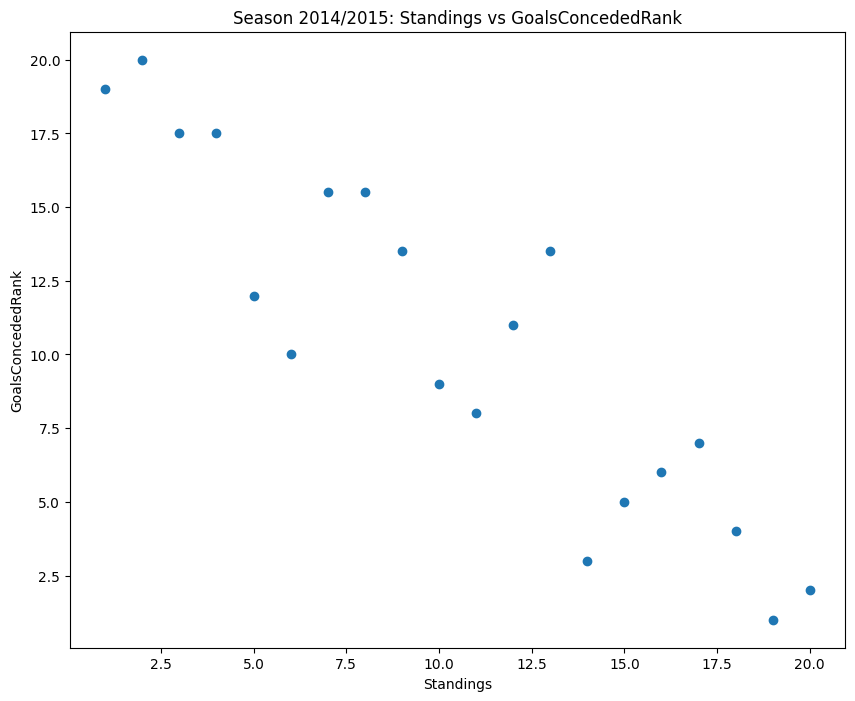

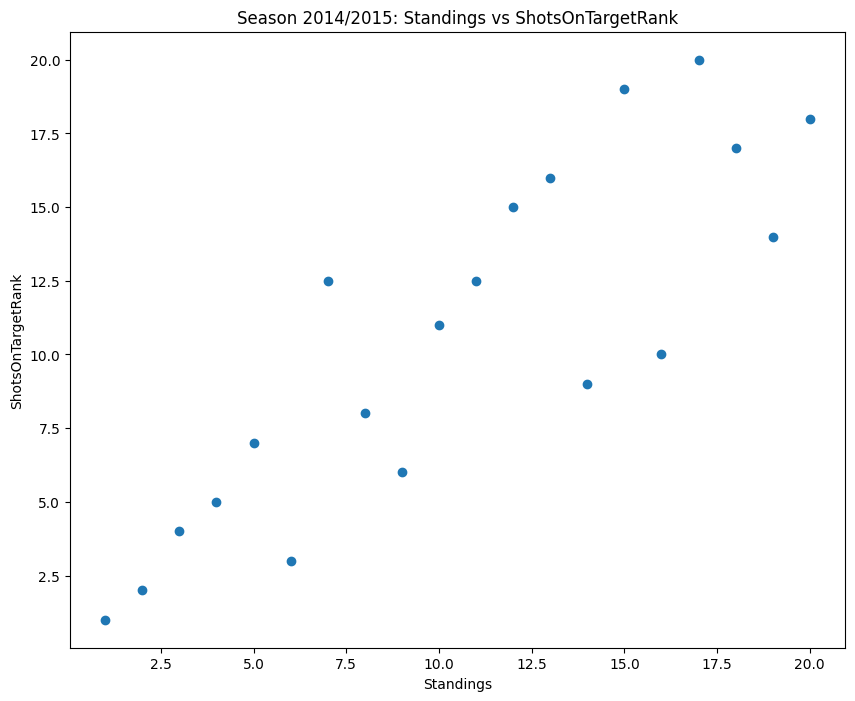

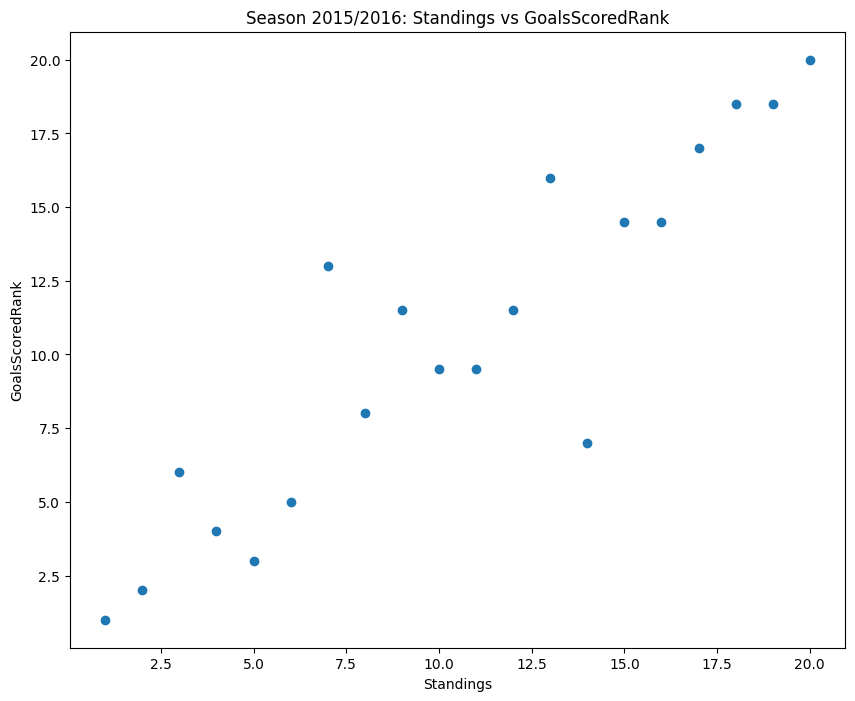

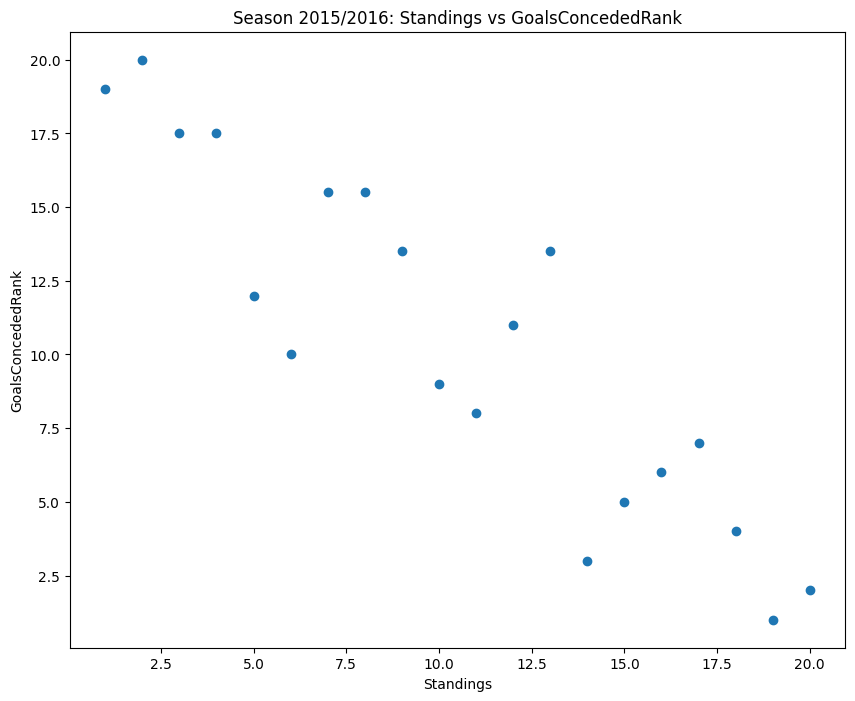

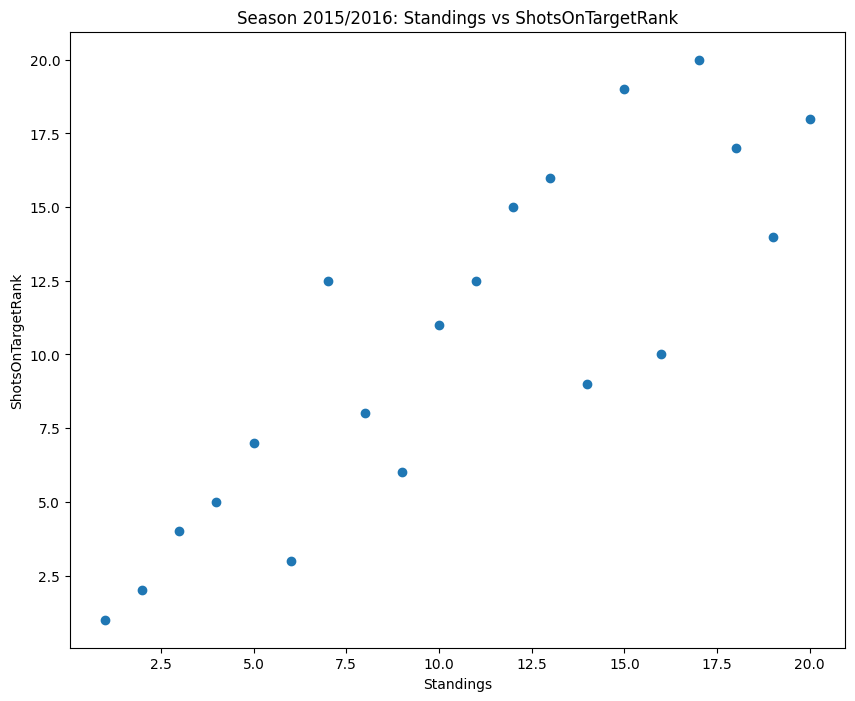

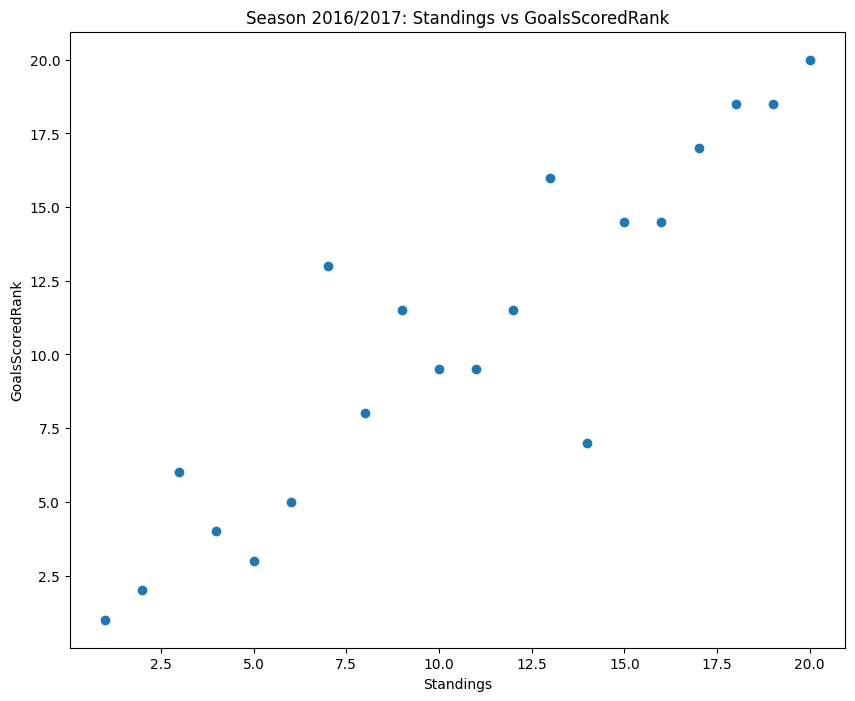

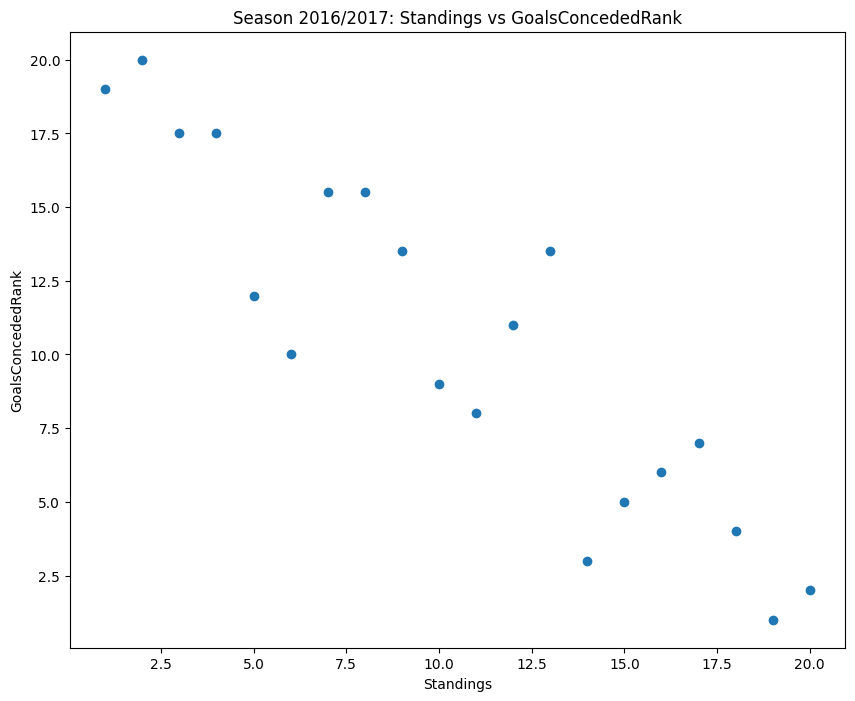

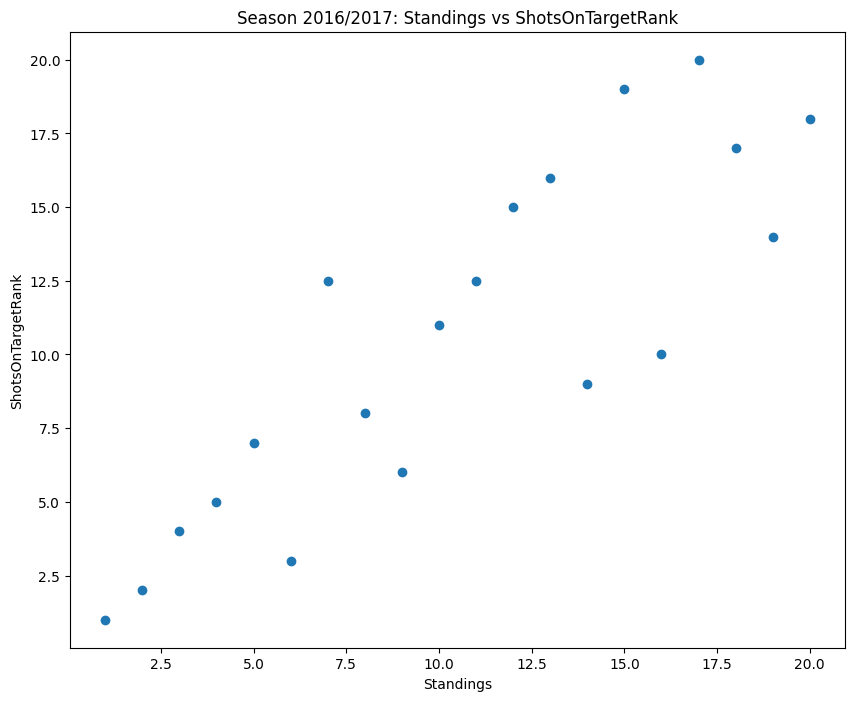

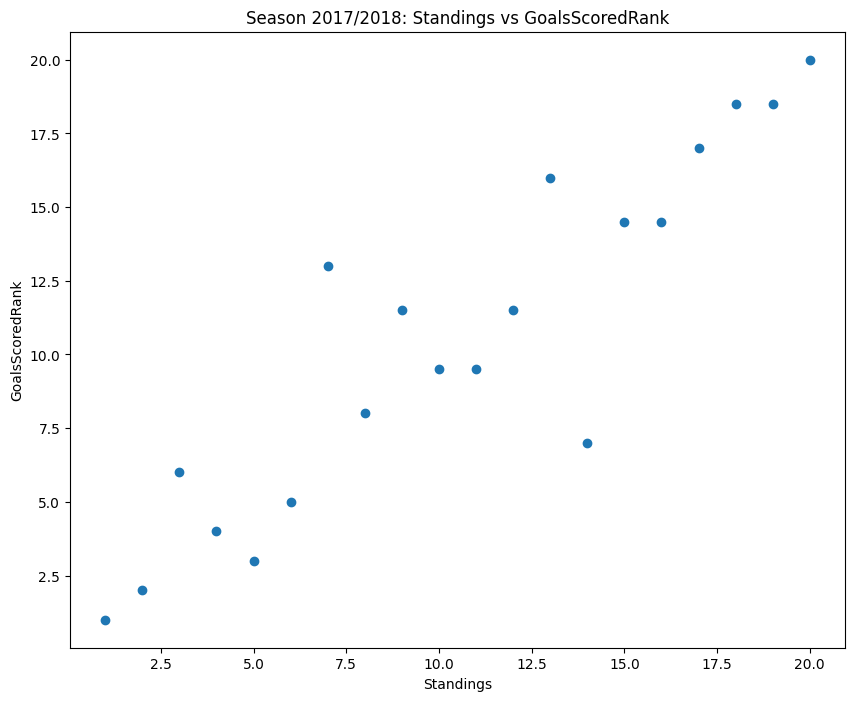

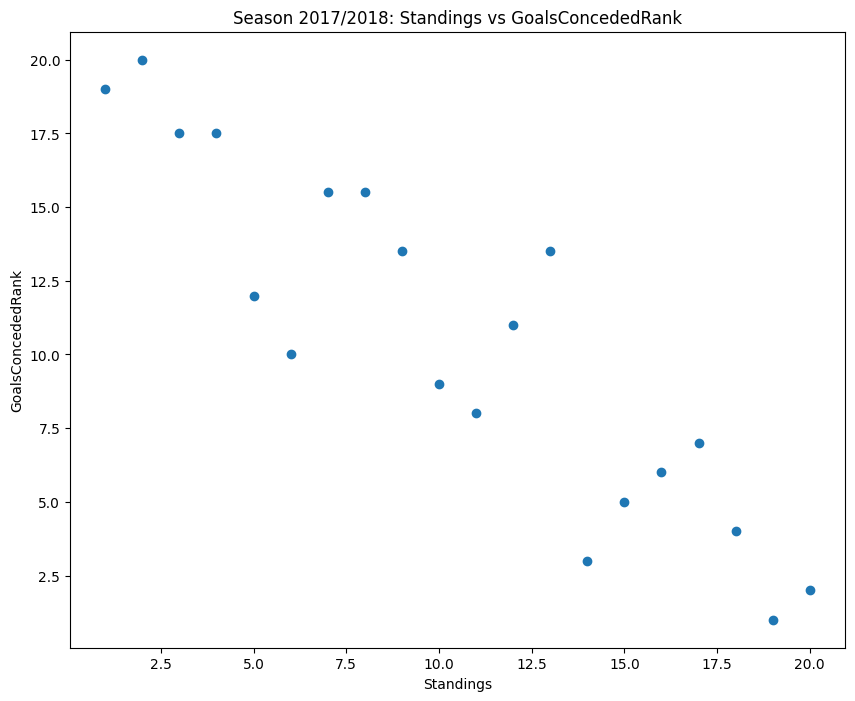

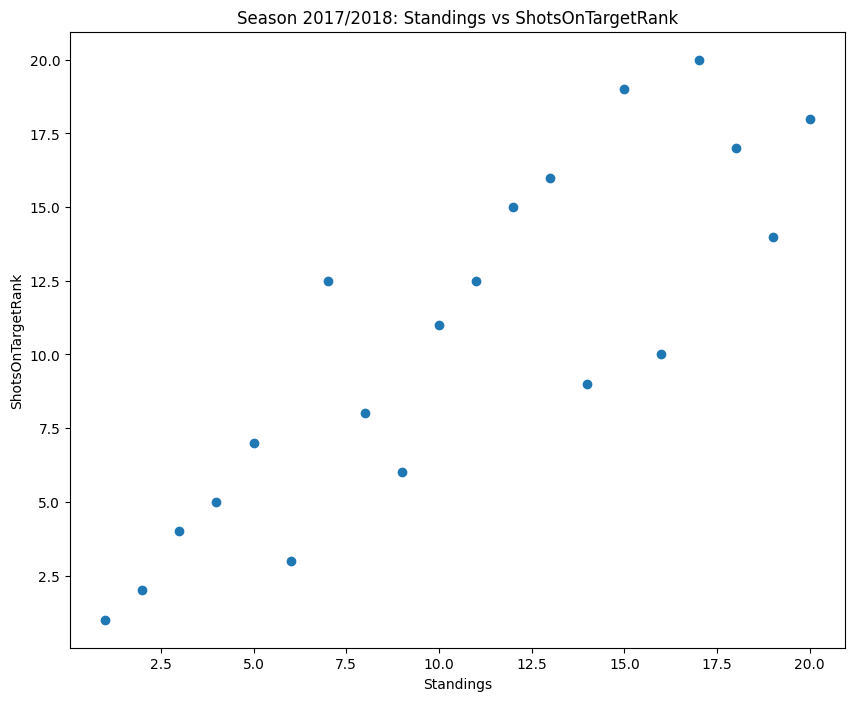

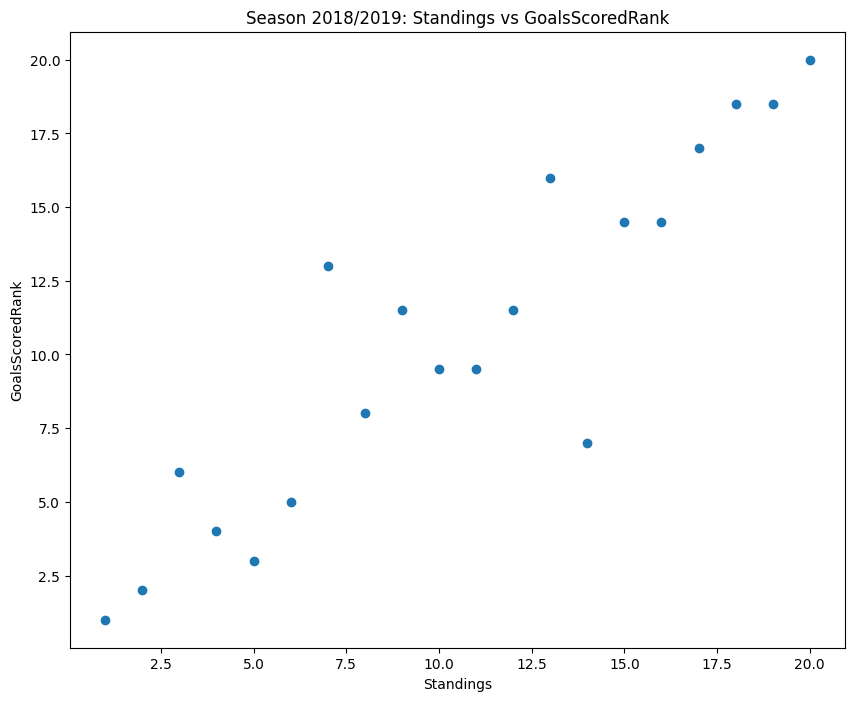

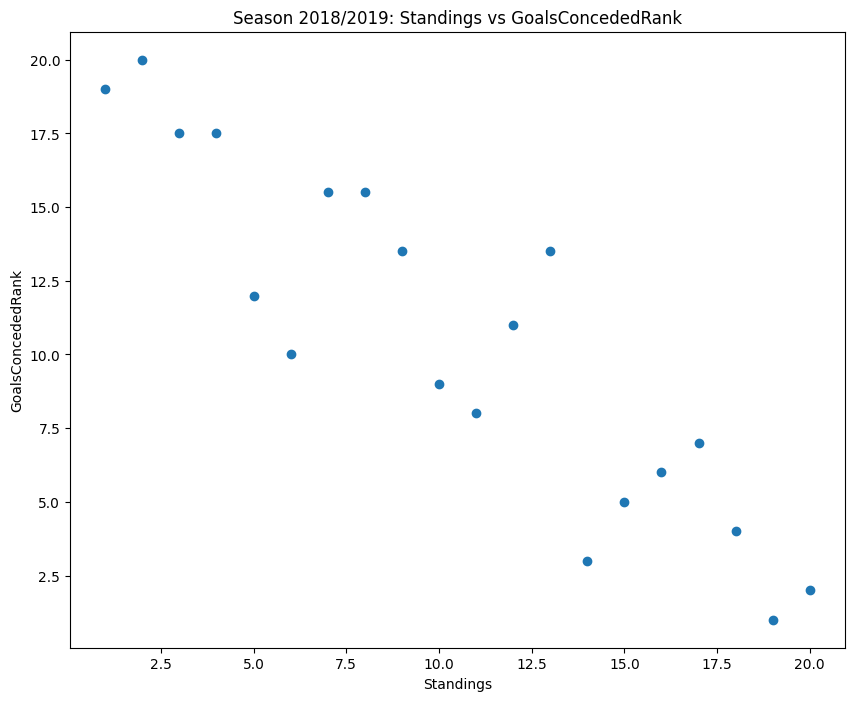

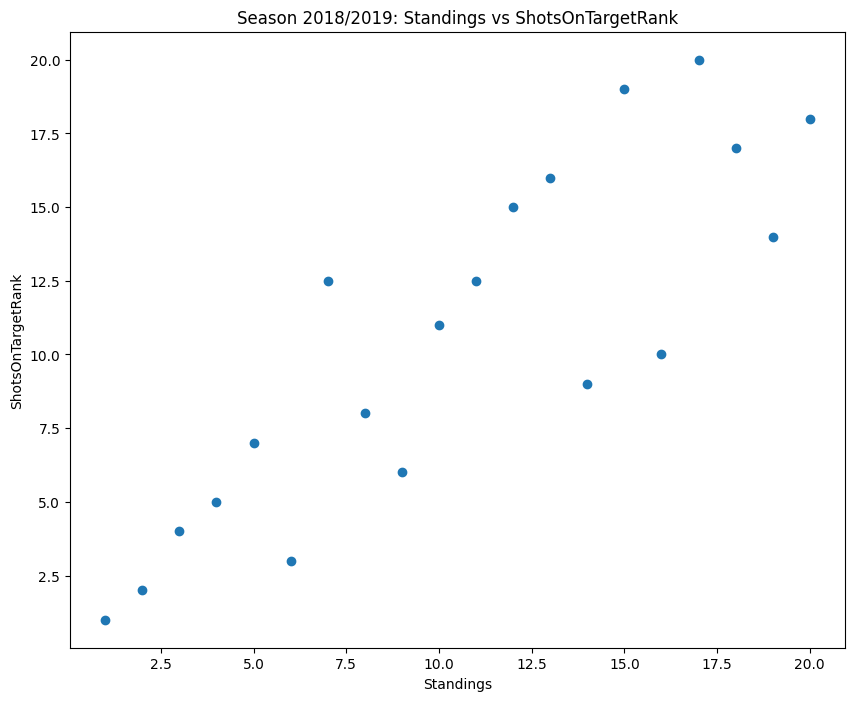

In [244]:
def process_season(data, season):
    # Assign points based on result (FTR)
    def assign_points(result):
        if result == 'H':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0

    # For away matches, the points assignment is slightly different
    def assign_points_away(result):
        if result == 'A':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0

    # Adding standings (Ranking based on points, goal difference and goals scored)
    standings['Standings'] = standings.index + 1

    # Adding rank for goals scored, goals conceded and shots on target
    standings['GoalsScoredRank'] = standings['GoalsScored'].rank(ascending=False)

    # Calculate goals conceded for ranking
    home_goals_conceded = data.groupby('HomeTeam')['FTAG'].sum()
    away_goals_conceded = data.groupby('AwayTeam')['FTHG'].sum()
    goals_conceded = home_goals_conceded.add(away_goals_conceded, fill_value=0)
    standings['GoalsConceded'] = standings['Team'].map(goals_conceded)
    standings['GoalsConcededRank'] = standings['GoalsConceded'].rank(ascending=False)

    # Assuming 'HST' and 'AST' are columns for home and away shots on target
    home_shots_target = data.groupby('HomeTeam')['HST'].sum()
    away_shots_target = data.groupby('AwayTeam')['AST'].sum()
    shots_target = home_shots_target.add(away_shots_target, fill_value=0)
    standings['ShotsOnTarget'] = standings['Team'].map(shots_target)
    standings['ShotsOnTargetRank'] = standings['ShotsOnTarget'].rank(ascending=False)

    return standings

def plot_rankings(data, season, metric):
    plt.figure(figsize=(10, 8))
    plt.scatter(data['Standings'], data[metric])
    plt.xlabel('Standings')
    plt.ylabel(metric)
    plt.title(f'Season {season}: Standings vs {metric}')
    plt.show()

season_standings = []

for i, df in enumerate(data_frames):
    season = f"{2009+i}/{2010 + i}"
    standings = process_season(df, season)
    season_standings.append(standings)

for i, standings in enumerate(season_standings):
    season = f"{2009+i}/{2010 + i}"
    plot_rankings(standings, season, 'GoalsScoredRank')
    plot_rankings(standings, season, 'GoalsConcededRank')
    plot_rankings(standings, season, 'ShotsOnTargetRank')


As you can see the correlation between the final placement of the team and the ranking in a criteria is the strongest in goals scored followed by goals conceded and then shots on target.


## ***Conclusion:***
As a result of this data analysis we have identified 3 factors from our data set that empirically give a the best chances to win a match/title in a season. These factors are Goals scored, goals conceded and shots on goal in this particular ranking. The data analysis couldve been more thorough and done better, but still we managed to draw reasonable conclusions, which align with my thesis in the begining. 